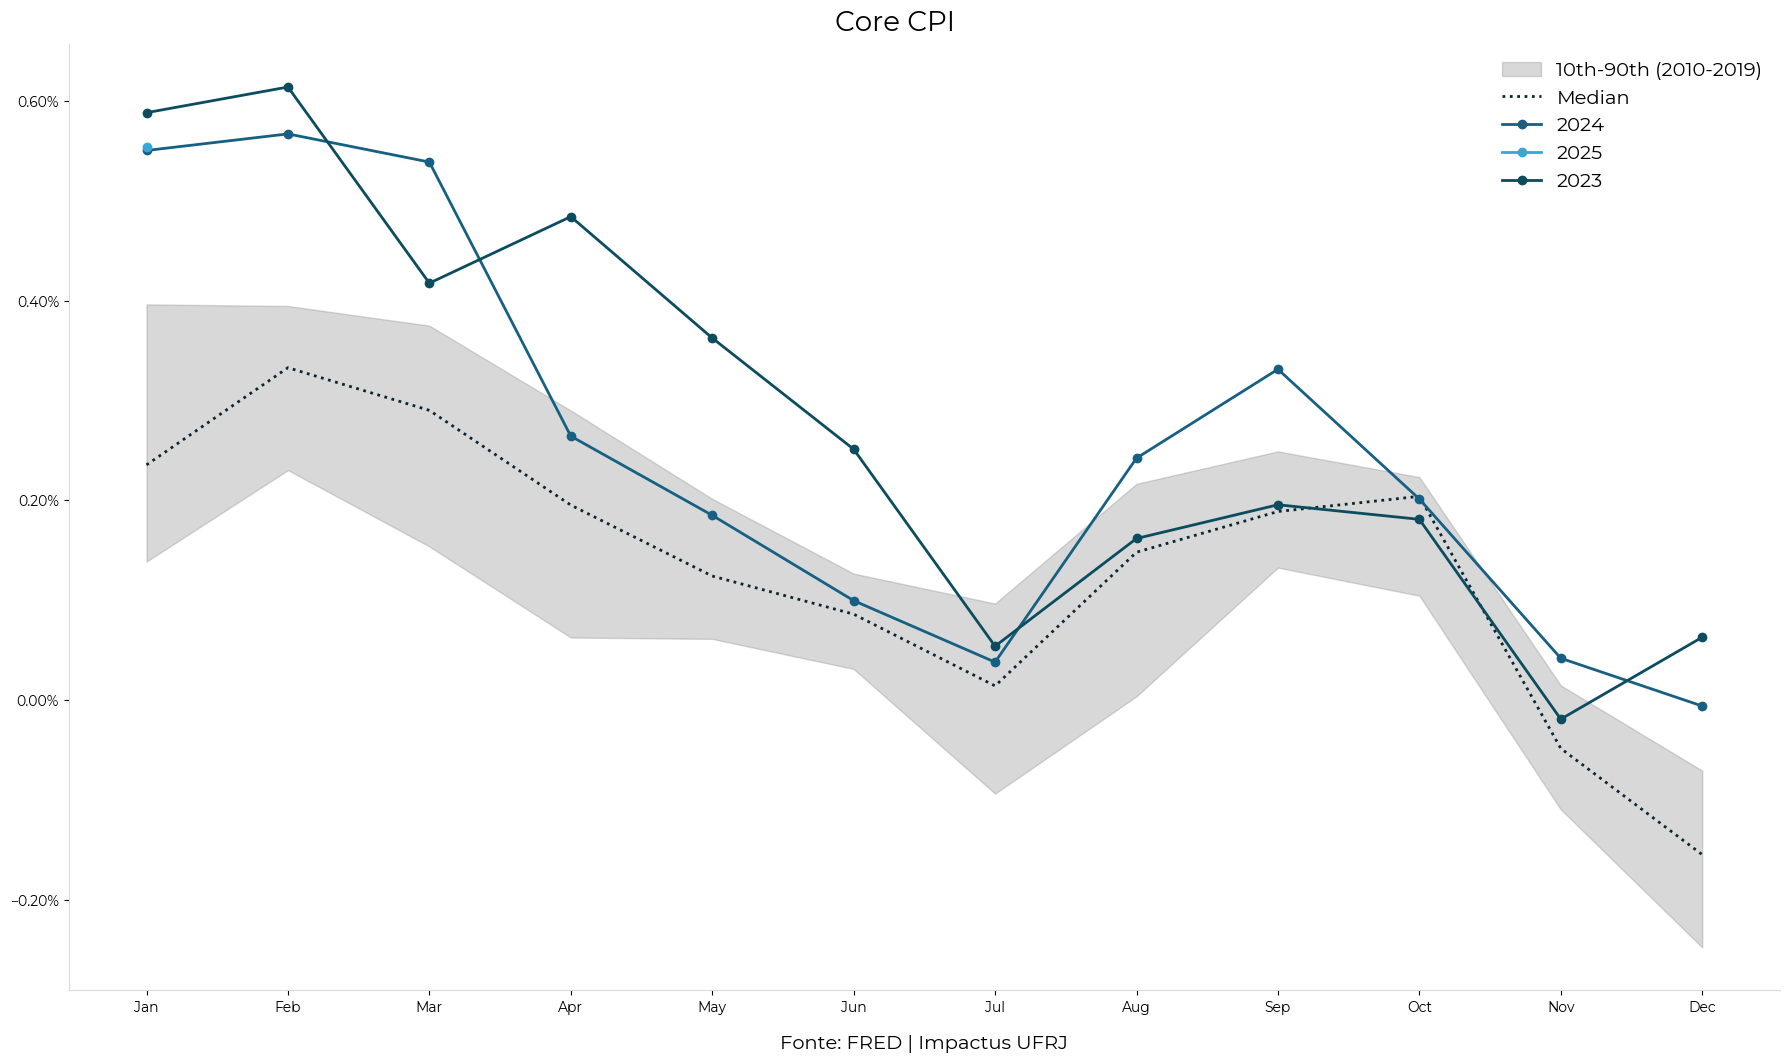

In [4]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

pc = fred.get_series("SUUR0000SA0L1E")
core_cpi = pd.DataFrame()
core_cpi["Nível de preços do núcleo"] = pd.DataFrame(pc)
core_cpi["Pct Change"] = core_cpi['Nível de preços do núcleo'].pct_change()
core_cpi.index = pd.to_datetime(core_cpi.index)

core_cpi_24 = core_cpi[core_cpi.index.year == 2024]
core_cpi_25 = core_cpi[core_cpi.index.year == 2025]
core_cpi_23 = core_cpi[core_cpi.index.year == 2023]

valores_2024 = core_cpi_24.groupby(core_cpi_24.index.month)["Pct Change"].first()
valores_2025 = core_cpi_25.groupby(core_cpi_25.index.month)["Pct Change"].first()
valores_2023 = core_cpi_23.groupby(core_cpi_23.index.month)["Pct Change"].first()

core_cpi = core_cpi[(core_cpi.index.year >= 2010) & (core_cpi.index.year <= 2019)]

percentil_10 = pd.DataFrame()
percentil_90 = pd.DataFrame()

for mes in range(1, 13):
    dados_mes = core_cpi[core_cpi.index.month == mes]["Pct Change"]
    percentil_10.loc[mes, "Percentil 10"] = dados_mes.quantile(0.10)
    percentil_90.loc[mes, "Percentil 90"] = dados_mes.quantile(0.90)

valores_2024 = []
valores_2025 = []

for mes in range(1, 13):
    valor_24 = core_cpi_24[core_cpi_24.index.month == mes]["Pct Change"].values
    valor_25 = core_cpi_25[core_cpi_25.index.month == mes]["Pct Change"].values
    valores_2024.append(valor_24[0] if len(valor_24) > 0 else None)
    valores_2025.append(valor_25[0] if len(valor_25) > 0 else None)

valores_dos_graficos = pd.DataFrame()
valores_dos_graficos["Percentil 10"] = percentil_10["Percentil 10"]
valores_dos_graficos["Percentil 90"] = percentil_90["Percentil 90"]
valores_dos_graficos["Ano de 2024"] = valores_2024
valores_dos_graficos["Ano de 2025"] = valores_2025
valores_dos_graficos["Ano de 2023"] = valores_2023
valores_dos_graficos["Mediana"] = core_cpi.groupby(core_cpi.index.month)["Pct Change"].median()
valores_dos_graficos.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.fill_between(valores_dos_graficos.index, valores_dos_graficos["Percentil 10"], valores_dos_graficos["Percentil 90"], color="grey", alpha=0.3, label="10th-90th (2010-2019)")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Mediana"], linestyle="dotted", linewidth=2, color="#082631", label="Median")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2023"], marker="o", linewidth=2, color="#0B4C5F", label="2023")
plt.suptitle("Core CPI", fontsize=20, fontweight='bold')
plt.legend(frameon=False, fontsize=14, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()

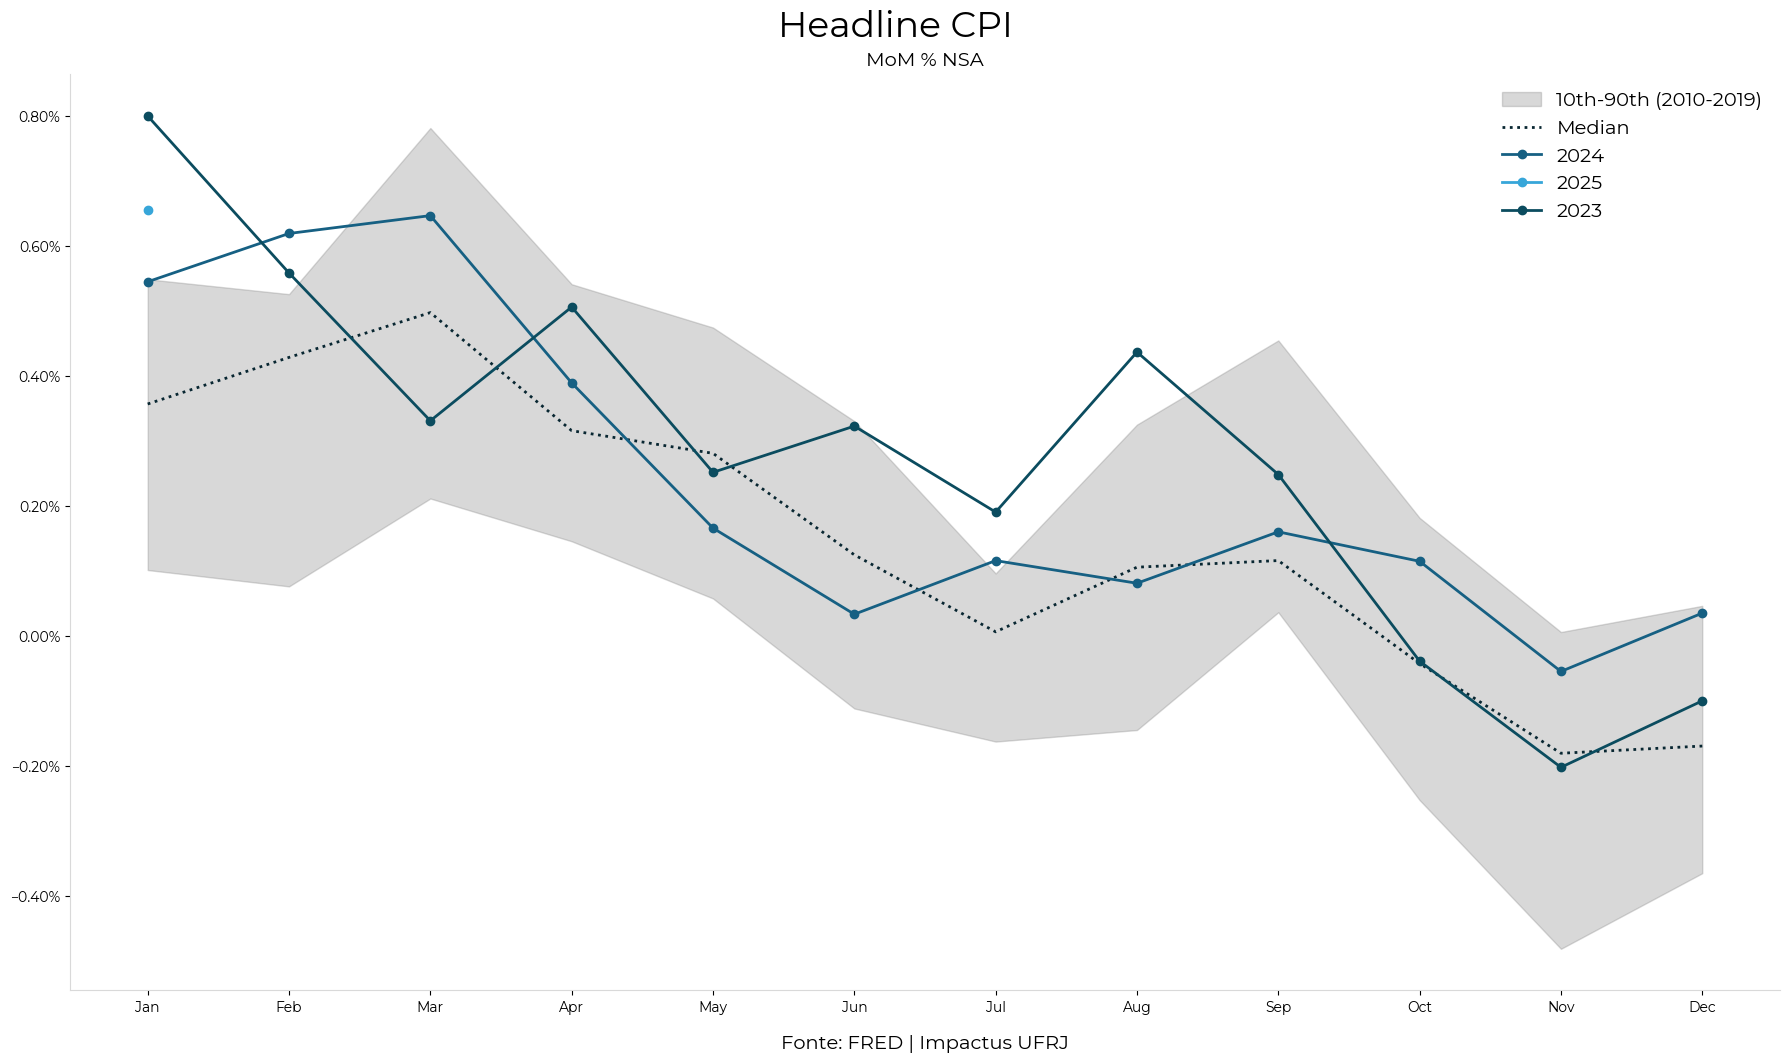

In [21]:
# headline cpi

cpi = fred.get_series('CPIAUCNS')
cpi_us = pd.DataFrame()
cpi_us["MoM %"] = pd.DataFrame(cpi).pct_change()

cpi_23 = cpi_us.loc[cpi_us.index.to_series().dt.year == 2023].copy()
cpi_24 = cpi_us.loc[cpi_us.index.to_series().dt.year == 2024].copy()
cpi_25 = cpi_us.loc[cpi_us.index.to_series().dt.year == 2025].copy()

valores_2024 = cpi_24.groupby(cpi_24.index.month)["MoM %"].first()
valores_2025 = cpi_25.groupby(cpi_25.index.month)["MoM %"].first()
valores_2023 = cpi_23.groupby(cpi_23.index.month)["MoM %"].first()

cpi_us = cpi_us[(cpi_us.index.year >= 2010) & (cpi_us.index.year <= 2019)]

percentil_10 = pd.DataFrame()
percentil_90 = pd.DataFrame()

for mes in range(1, 13):
    dados_mes = cpi_us[cpi_us.index.month == mes]["MoM %"]
    percentil_10.loc[mes, "Percentil 10"] = dados_mes.quantile(0.10)
    percentil_90.loc[mes, "Percentil 90"] = dados_mes.quantile(0.90)

valores_dos_graficos = pd.DataFrame()
valores_dos_graficos["Percentil 10"] = percentil_10["Percentil 10"]
valores_dos_graficos["Percentil 90"] = percentil_90["Percentil 90"]
valores_dos_graficos["Ano de 2024"] = valores_2024
valores_dos_graficos["Ano de 2025"] = valores_2025
valores_dos_graficos["Ano de 2023"] = valores_2023
valores_dos_graficos["Mediana"] = cpi_us.groupby(cpi_us.index.month)["MoM %"].median()
valores_dos_graficos.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.fill_between(valores_dos_graficos.index, valores_dos_graficos["Percentil 10"], valores_dos_graficos["Percentil 90"], color="grey", alpha=0.3, label="10th-90th (2010-2019)")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Mediana"], linestyle="dotted", linewidth=2, color="#082631", label="Median")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(valores_dos_graficos.index, valores_dos_graficos["Ano de 2023"], marker="o", linewidth=2, color="#0B4C5F", label="2023")
plt.suptitle("Headline CPI", fontsize=26, fontweight='bold')
plt.title("MoM % NSA", fontsize= 14)
plt.legend(frameon=False, fontsize=14, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()